# Introduction

 Welcome to the Cyclistic bike-share analysis case study! This case study is part of the Google Data Analytics Professional Certificate. The case study is about a company called Cyclistic, a bike-share company in Chicago. In this case study, we will perform an analysis of the bike-share data for the company Cyclistic. 
 We will be using the data to understand how casual riders and annual members use Cyclistic bikes differently.Also using the data to help the company make strategic decisions for the future.

#### About the company
* Cyclistic: is A bike-share program that features more than 5,800 bicycles and 600
docking stations. Cyclistic sets itself apart by also offering reclining bikes, hand
tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities
and riders who can’t use a standard two-wheeled bike.
The bikes can be unlocked from one station and returned to any other stationin the system anytime.
#### Objective
* The company's marketing strategy focuses on building awareness and appealing to diverse consumer segments. It offers pricing plans for single-ride passes, full-day passes, and annual memberships. `Annual members are more profitable than casual riders`. Cyclistic `aims to convert casual riders into members`, as they are already aware of the program and have chosen Cyclistic for their mobility needs.

# 1. Ask Phase

 As the objective of Cyclistic is to maximize the number of annual memberships, by understanding how casual riders and annual members use Cyclistic bikes differently, we can design a marketing strategy to convert casual riders into annual members. 
- To do that, we need to understand the following:<br><br>
Three questions will guide the future marketing program:
 1. How do annual members and casual riders use Cyclistic bikes differently?
 2. Why would casual riders buy Cyclistic annual memberships?
 3. How can Cyclistic use digital media to influence casual riders to become members?


- To answer these questions, we will analyze the Cyclistic data to understand the behavior of casual riders and annual members. 



Let's start by loading the data and understanding the data.



# 2. Prepare The Data

The datset used in this case is Cyclistic’s historical trip data , which is publicly available at this [link](https://divvy-tripdata.s3.amazonaws.com/index.html) . The data has been made available Motivate International Inc. under this [license](https://www.divvybikes.com/data-license-agreement).

 we will use the data from data from `Divvy 2019 Q1` to `Divvy 2020 Q4` (four quarters) to analyze the data and provide insights to the stakeholders.
 The data is available in the form of csv files and we will use pandas to read the data and manipulate it.



In [1]:
# import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### COLLECT DATA

In [2]:
# read the four datasets into pandas dataframes
q1_2019 = pd.read_csv('Divvy_Trips_2019_Q1.csv')
q2_2019 = pd.read_csv('Divvy_Trips_2019_Q2.csv')
q3_2019 = pd.read_csv('Divvy_Trips_2019_Q3.csv')
q4_2019 = pd.read_csv('Divvy_Trips_2019_Q4.csv')

#### WRANGLE DATA AND COMBINE INTO A SINGLE FILE

##### compare the datasets

In [3]:
# check the shape of the two datasets
print(q1_2019.shape)
print(q2_2019.shape)
print(q3_2019.shape)
print(q4_2019.shape)

(365069, 12)
(1108163, 12)
(1640718, 12)
(704054, 12)


In [4]:
# check if the datasets have the same columns
if q1_2019.columns.all() == q2_2019.columns.all() == q3_2019.columns.all() == q4_2019.columns.all():
    print('The datasets have the same columns')

The datasets have the same columns


- the columns are the same for all the datasets, so we can concatenate them into one dataframe
- we will use the pandas concat function to do this
- we will also add a column to each dataframe to indicate the quarter

In [5]:
# add a column to each dataset to indicate the quarter
q1_2019['quarter'] = 'q1'
q2_2019['quarter'] = 'q2'
q3_2019['quarter'] = 'q3'
q4_2019['quarter'] = 'q4'


In [6]:
# concatenate the dataframes
df = pd.concat([q1_2019, q2_2019, q3_2019, q4_2019])
df.shape


(3818004, 13)

#### CLEAN UP AND ADD DATA TO PREPARE FOR ANALYSIS

In [7]:
# check the first few rows of the dataframe
df.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,quarter
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0,q1
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0,q1
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0,q1
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0,q1
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0,q1


In [8]:
# check the data types of the columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3818004 entries, 0 to 704053
Data columns (total 13 columns):
 #   Column             Dtype  
---  ------             -----  
 0   trip_id            int64  
 1   start_time         object 
 2   end_time           object 
 3   bikeid             int64  
 4   tripduration       object 
 5   from_station_id    int64  
 6   from_station_name  object 
 7   to_station_id      int64  
 8   to_station_name    object 
 9   usertype           object 
 10  gender             object 
 11  birthyear          float64
 12  quarter            object 
dtypes: float64(1), int64(4), object(8)
memory usage: 407.8+ MB


- from the data info, we can see that the `start_time` and `end_time` columns are not in datetime format. We will convert them to `datetime` format.
- also, the `trip_id`,`bikeid`, `start_station_id` and `end_station_id` are not in the right format. We will convert them to string format.
- we will also drop the `tripduration` column as it is string format and we can calculate the trip duration from the `start_time` and `end_time` columns.
- also we will add new columns for the day of the week, month
- add a new column `age` to indicate the age of the rider at the time of the trip, we can calculate this from the `birthyear` column


In [9]:
# convert the start_time and end_time columns to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
# convert the trip_id, from_station_id, to_station_id, bikeid from int to object
df['trip_id'] = df['trip_id'].astype('object')
df['from_station_id'] = df['from_station_id'].astype('object')
df['to_station_id'] = df['to_station_id'].astype('object')
df['bikeid'] = df['bikeid'].astype('object')

In [10]:
# drop the tripduration column 
df.drop('tripduration', axis=1, inplace=True)
# add new column the duration of each trip in minutes
df['duration'] = round((df['end_time'] - df['start_time']).dt.total_seconds() / 60, 2)


In [11]:
# add new columns for the  day, day of the week and month
df['day'] = df['start_time'].dt.day
df['day_of_week'] = df['start_time'].dt.day_name()
df['month'] = df['start_time'].dt.month_name()

In [12]:
# calculate age from birthyear column and add a new column
df['age'] = 2020 - df['birthyear']

In [13]:
# calculate missing values as a percentage of the total number of rows
missing_values = df.isnull().sum()/len(df)*100
missing_values

trip_id               0.000000
start_time            0.000000
end_time              0.000000
bikeid                0.000000
from_station_id       0.000000
from_station_name     0.000000
to_station_id         0.000000
to_station_name       0.000000
usertype              0.000000
gender               14.646554
birthyear            14.110802
quarter               0.000000
duration              0.000000
day                   0.000000
day_of_week           0.000000
month                 0.000000
age                  14.110802
dtype: float64

there are missing values in the columns 'birthyear'  and 'gender' with around 14% of the rows. . We will drop the rows with missing values because imputing the missing values will not be accurate and will introduce bias into the data.


In [14]:
# drop the missing values
df = df.dropna()

In [15]:
# check for duplicates
duplicates = df.duplicated().sum()
duplicates

0

 there are no duplicates in the dataset so we can proceed to the next step

#### Check for outliers

In [16]:
# print the data description of the numerical columns with round to 2 decimal places
df.describe().round(2)

,start_time,end_time,birthyear,duration,day,age
count,3258796,3258796,3258796.00,3258796.00,3258796.00,3258796.00
mean,2019-07-19 15:27:20.623801600,2019-07-19 15:45:11.743431936,1984.08,17.85,15.52,35.92
min,2019-01-01 00:04:37,2019-01-01 00:11:07,1759.00,-56.37,1.00,6.00
25%,2019-05-25 18:41:44.500000,2019-05-25 19:06:00.750000128,1979.00,6.33,8.00,28.00
50%,2019-07-26 07:59:52.500000,2019-07-26 08:14:23,1987.00,10.52,15.00,33.00
75%,2019-09-17 18:28:34.249999872,2019-09-17 18:45:49.249999872,1992.00,17.93,23.00,41.00
max,2019-12-31 23:57:17,2020-01-10 01:06:36,2014.00,150943.90,31.00,261.00
std,NaN,NaN,10.86,346.21,8.70,10.86


* from the description, the maximum age is 261 which is not possible. we will remove the rows with age greater than 100,
also the minimum duration is -56.37 which is not possible. we will remove the rows with duration less than 0.
* Max duration of is 150943.90 minutes which is 24 hours, this is not possible, we will remove the rows with duration greater than 24 hours

In [17]:
# remove rows with age greater than 100 and rows with duration greater than 24 hours and less than 1 minute
df = df[(df['age'] <= 100) & (df['duration'] <= 1440) & (df['duration'] >= 1)]

In [18]:
df.describe().round(2)

,start_time,end_time,birthyear,duration,day,age
count,3257169,3257169,3257169.00,3257169.00,3257169.00,3257169.00
mean,2019-07-19 15:28:06.958864896,2019-07-19 15:43:25.773369344,1984.10,15.31,15.52,35.90
min,2019-01-01 00:04:37,2019-01-01 00:11:07,1920.00,1.02,1.00,6.00
25%,2019-05-25 18:43:29,2019-05-25 19:07:40,1979.00,6.33,8.00,28.00
50%,2019-07-26 07:58:47,2019-07-26 08:11:45,1987.00,10.52,15.00,33.00
75%,2019-09-17 18:27:42,2019-09-17 18:43:17,1992.00,17.93,23.00,41.00
max,2019-12-31 23:57:17,2020-01-01 17:25:25,2014.00,1439.75,31.00,100.00
std,NaN,NaN,10.79,25.85,8.70,10.79


# 3. CONDUCT DESCRIPTIVE ANALYSIS

In [19]:
df.head()

,trip_id,start_time,end_time,bikeid,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,quarter,duration,day,day_of_week,month,age
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0,q1,6.50,1,Tuesday,January,31.0
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0,q1,7.35,1,Tuesday,January,30.0
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0,q1,13.82,1,Tuesday,January,26.0
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0,q1,29.72,1,Tuesday,January,27.0
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0,q1,6.07,1,Tuesday,January,26.0


In [20]:
# how many unique stations are there in the dataset
unique_stations = df['from_station_name'].nunique()
print(f'There are {unique_stations} unique stations in the dataset')

There are 638 unique stations in the dataset


In [21]:
# how many unique bikes are there in the dataset
unique_bikes = df['bikeid'].nunique()
print(f'There are {unique_bikes} unique bikes in the dataset')

There are 6011 unique bikes in the dataset


### Trip Duration

In [22]:
# describtive statistics of the duration column
print(f'The mean duration of the trips is {df["duration"].mean().round(2)} minutes')
print(f'The median duration of the trips is {df["duration"].median().round(2)} minutes')
print(f'The minimum duration of the trips is {df["duration"].min().round(2)} minutes')
print(f'The maximum duration of the trips is {df["duration"].max().round(2)} minutes')


The mean duration of the trips is 15.31 minutes


The median duration of the trips is 10.52 minutes
The minimum duration of the trips is 1.02 minutes
The maximum duration of the trips is 1439.75 minutes


In [23]:
# group duration by user type an aggregate by mean and median  
duration_by_user_type = df.groupby('usertype')['duration'].agg(['mean', 'median', 'min', 'max','sum','count']).round(2)
duration_by_user_type

,mean,median,min,max,sum,count
usertype,,,,,,
Customer,35.70,23.07,1.02,1437.08,12271477.10,343768
Subscriber,12.91,9.80,1.02,1439.75,37607422.62,2913401


 * from the above table, we can see that the average duration of the trips for customers is higher than subscribers . although the mean and median duration of the trips for customers is higher than  subscribers, but the sum of the duration and the count of the trips for subscribers is much higher than customers.
 * so we can conclude that subscribers ar more likely to take shorter trips than customers but they take much more trips than customers and in 2019 they make for almost 90% of the total trips, and more than 75% of the total duration of trips.

In [24]:
# duration by day of the week and user type
duration_by_day_of_week = df.groupby(['day_of_week', 'usertype'])['duration'].agg(['mean', 'median']).round(2)
duration_by_day_of_week

mean  median
day_of_week usertype                 
Friday      Customer    34.73   22.18
            Subscriber  12.52    9.53
Monday      Customer    35.46   22.60
            Subscriber  12.62    9.65
Saturday    Customer    38.76   26.20
            Subscriber  14.44   10.65
Sunday      Customer    38.10   24.98
            Subscriber  14.20   10.52
Thursday    Customer    32.98   20.77
            Subscriber  12.62    9.65
Tuesday     Customer    33.26   20.33
            Subscriber  12.57    9.65
Wednesday   Customer    31.94   20.31
            Subscriber  12.60    9.70

c:\Users\moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

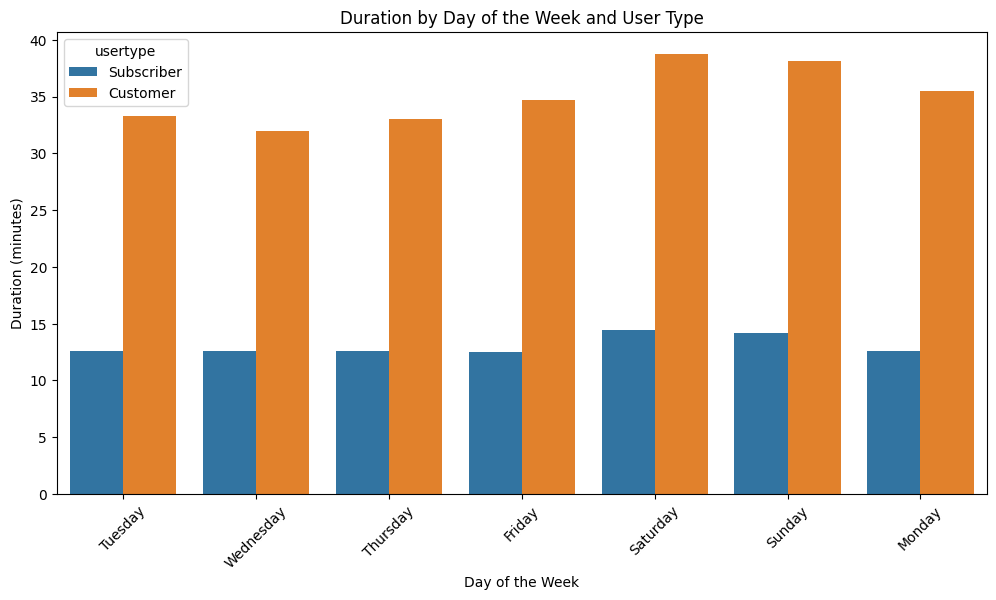

In [25]:
# plot the duration by day of the week and user type

plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_week', y='duration', hue='usertype', data=df, errorbar=None)
plt.title('Duration by Day of the Week and User Type')
plt.xlabel('Day of the Week')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.show();

 - from the plot, we can see that customers have longer trip durations than subscribers on all days of the week
 - the longest trip durations for customers are on Saturdays and Sundays and also the longest trip durations for subscribers are on Saturdays and Sundays.

In [26]:
# user type by day of the week 
user_type_by_day_of_week = df.groupby(['day_of_week', 'usertype'])['trip_id'].count().unstack().fillna(0)
user_type_by_day_of_week

usertype,Customer,Subscriber
day_of_week,,
Friday,47048,453283
Monday,40612,455140
Saturday,78513,284478
Sunday,63462,253859
Thursday,41062,483076
Tuesday,36339,493059
Wednesday,36732,490506


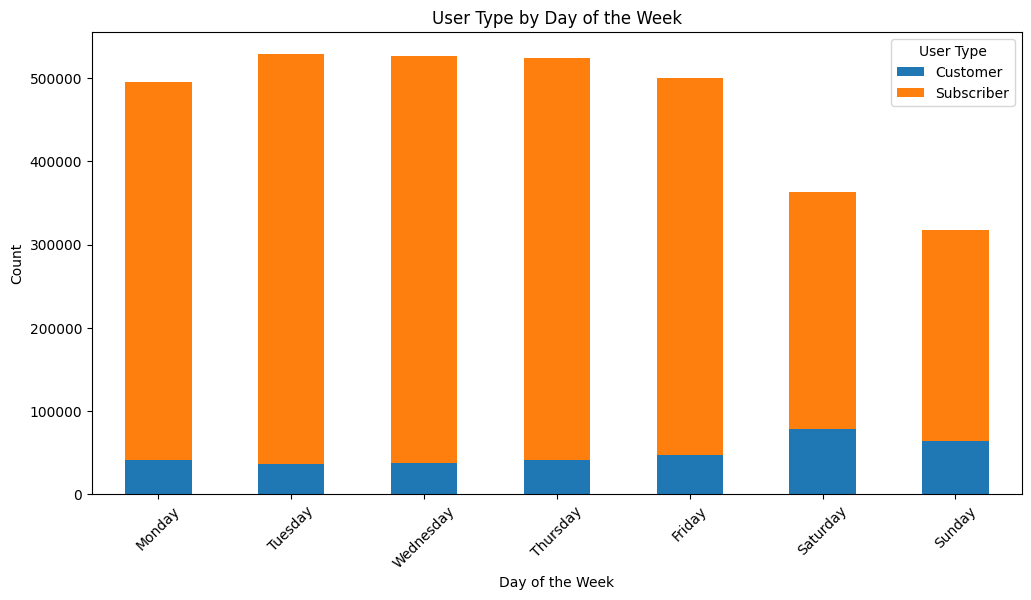

In [27]:
# plot the user type by day of the week
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
user_type_by_day_of_week = user_type_by_day_of_week.reindex(days)
user_type_by_day_of_week.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('User Type by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='User Type', loc='upper right')
plt.show()

- as we can see from the plot, the number of subscribers is higher than the number of customers on all days of the week.
- in saturday and sunday, customers are making more trips than other days of the week, despite the subscribers making less trips on weekends.
- we can also conclude that subscribers are making trips more during the weekdays than the weekends, but custumers making trips more in weekends than weekdays.

In [28]:
# user type by month and aggregate by count and sort by month
user_type_by_month = df.groupby(['month', 'usertype'])['trip_id'].count().unstack().fillna(0)

user_type_by_month

usertype,Customer,Subscriber
month,,
April,13102,216157
August,83117,399815
December,6134,137366
February,730,92719
January,1185,97895
July,75323,378101
June,42600,342928
March,4008,148576
May,23678,283799


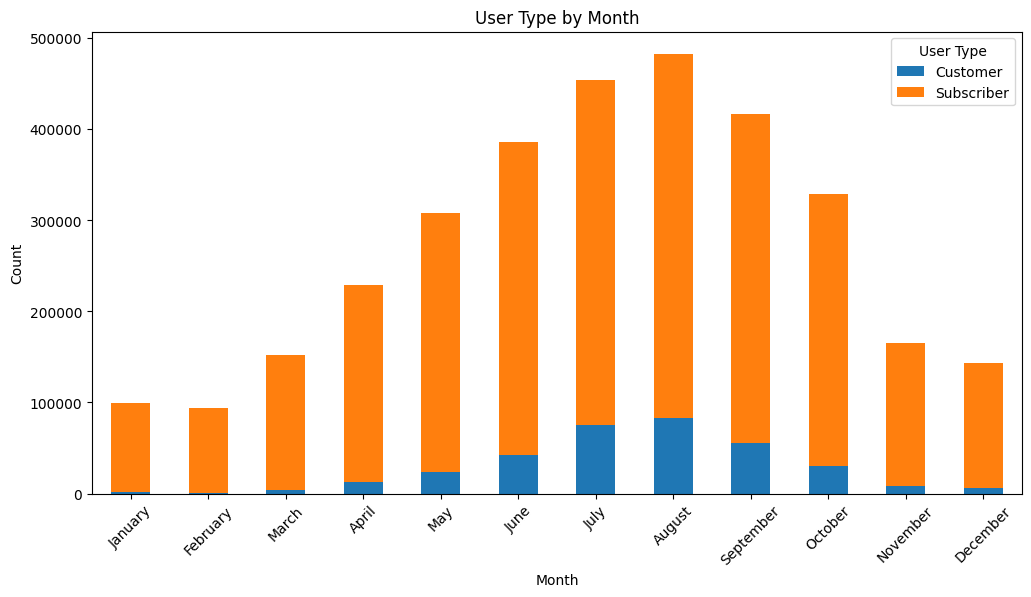

In [29]:
# plot the user type by month
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
user_type_by_month = user_type_by_month.reindex(months)
user_type_by_month.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('User Type by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='User Type', loc='upper right')
plt.show()

- from the user type by month plot, we can see that the number of customers is higher than the number of subscribers across all the months.
- in the month of January, February, March, April, May and June, the number of customers is significantly very low. this could be due to the fact that the weather is colder in these months and people are less likely to use the bikes for leisure activities.
- in the month of July, August and September, the number of customers is significantly higher than all the other months.
- This could be due to the fact that the weather is warmer in these months and people are more likely to use the bikes for leisure activities.

In [30]:
# user type by gender and aggregate by count
user_type_gender = df.groupby(['gender', 'usertype'])['trip_id'].count().unstack().fillna(0)
user_type_gender

usertype,Customer,Subscriber
gender,,
Female,131267,726387
Male,212501,2187014


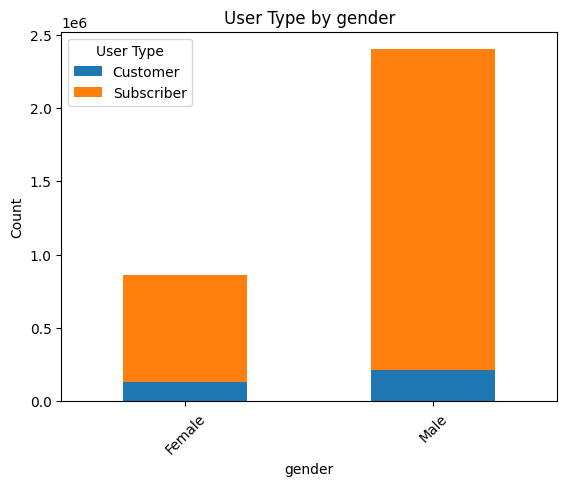

In [31]:
# plot the user type by gender
user_type_gender.plot(kind='bar', stacked=True)
plt.title('User Type by gender')
plt.xlabel('gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='User Type', loc='upper left')
plt.show()


- as we can see from the plot above, male users are the most frequent users. 


In [32]:
# age by user type and aggregate by mean
age_by_user_type = df.groupby('usertype')['age'].mean().round(2)
age_by_user_type

usertype
Customer      31.94
Subscriber    36.37
Name: age, dtype: float64

In [33]:
# user type by age and aggregate by count
user_type_age = df.groupby(['age', 'usertype'])['trip_id'].count().unstack().fillna(0)
user_type_age

usertype,Customer,Subscriber
age,,
6.0,0.0,3.0
17.0,290.0,468.0
18.0,1087.0,1009.0
19.0,3057.0,5650.0
20.0,7226.0,11369.0
...,...,...
90.0,0.0,35.0
91.0,0.0,5.0
95.0,2.0,0.0


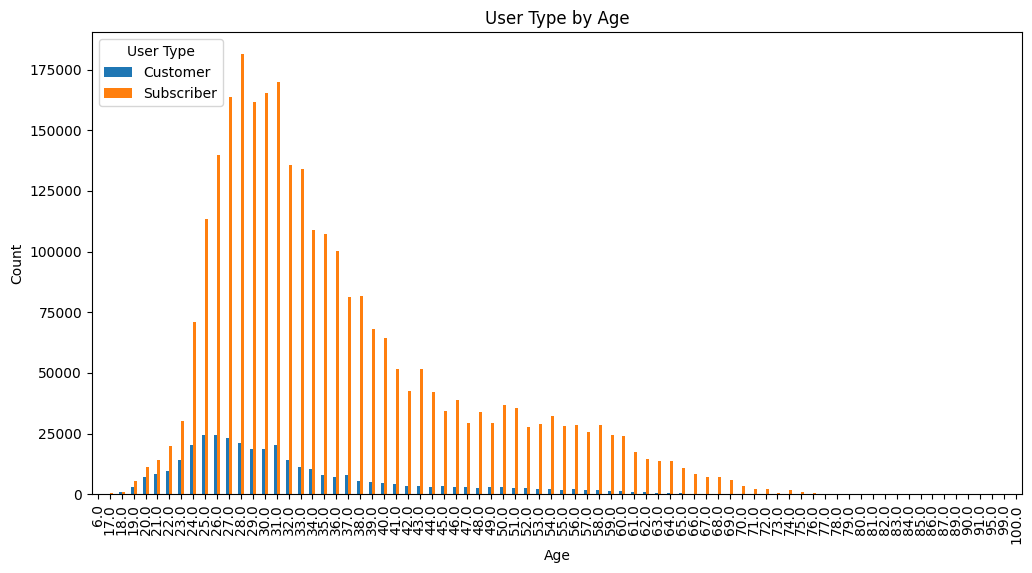

In [34]:
# plot the user type by age
user_type_age.plot(kind='bar', figsize=(12, 6))
plt.title('User Type by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='User Type', loc='upper left')
plt.show()

- from the plot, we can see that the majority of the users are between 20 and 40 years old and as the age increases the number of users is becoming less.
- we can also see that the majority of the users are subscribers, subscribers are more than customers in all age groups.
- the subscribers has peak at 28 years old and the customers has peak at 25 years old so 

In [35]:
# which stations are the most popular?
popular_stations = df['from_station_name'].value_counts().head(10)
popular_stations

from_station_name
Canal St & Adams St             52224
Clinton St & Madison St         47458
Clinton St & Washington Blvd    46430
Columbus Dr & Randolph St       33701
Franklin St & Monroe St         32468
Kingsbury St & Kinzie St        32243
Daley Center Plaza              31738
Streeter Dr & Grand Ave         30901
Michigan Ave & Washington St    29331
Canal St & Madison St           28181
Name: count, dtype: int64

In [36]:
# most popular stations by user type
popular_stations_by_user_type = df.groupby(['from_station_name', 'usertype'])['trip_id'].count().unstack().fillna(0)
popular_stations_by_user_type['total'] = popular_stations_by_user_type['Customer'] + popular_stations_by_user_type['Subscriber']
popular_stations_by_user_type = popular_stations_by_user_type.sort_values(by='total', ascending=False).head(10)
popular_stations_by_user_type

usertype,Customer,Subscriber,total
from_station_name,,,
Canal St & Adams St,1719.0,50505.0,52224.0
Clinton St & Madison St,1857.0,45601.0,47458.0
Clinton St & Washington Blvd,1336.0,45094.0,46430.0
Columbus Dr & Randolph St,2604.0,31097.0,33701.0
Franklin St & Monroe St,1740.0,30728.0,32468.0
Kingsbury St & Kinzie St,1792.0,30451.0,32243.0
Daley Center Plaza,1451.0,30287.0,31738.0
Streeter Dr & Grand Ave,16106.0,14795.0,30901.0
Michigan Ave & Washington St,4069.0,25262.0,29331.0


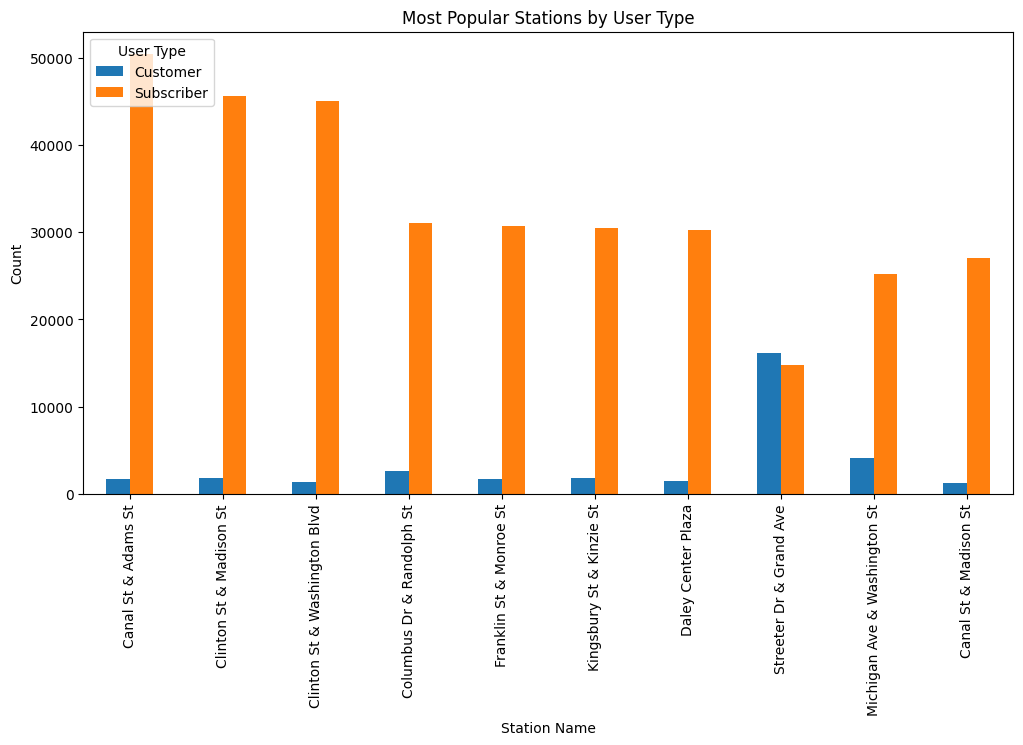

In [37]:
# plot the most popular stations by user type
popular_stations_by_user_type.drop('total', axis=1).plot(kind='bar', figsize=(12, 6))
plt.title('Most Popular Stations by User Type')
plt.xlabel('Station Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='User Type', loc='upper left')
plt.show()


from the plot above, we can see that subscribers are the most frequent users of the most popular stations except for the station with the name 'Streeter Dr & Grand Ave' where customers are the most frequent users.



# Summary
- Subscribers make up the majority of users, accounting for almost 90% of the total trips and more than 75% of the total duration of trips.
- Customers tend to take longer trips compared to subscribers, but subscribers take a significantly higher number of trips.
- Trip durations for both customers and subscribers are longer on weekends, particularly on Saturdays and Sundays.
- subscribers are making trips more during the weekdays than the weekends, but custumers making trips more in weekends than weekdays.
- The number of customers is significantly higher in the months of July, August, and September, possibly due to warmer weather and increased leisure activities.
- Male users are the most frequent users of the bike sharing service.
- The majority of users are between 20 and 40 years old, with the number of users decreasing as age increases.
- The most popular stations are predominantly used by subscribers, except for one station where customers are the most frequent users.


# Conclusion

##### Based on the analysis, here are some key differences between subscribers and customers:


1. **Usage**: Subscribers make up the majority of users, accounting for almost 90% of the total trips. This suggests that subscribers use the bike sharing service more frequently than customers.

2. **Trip Duration**: Customers tend to take longer trips compared to subscribers. This could indicate that customers use the service for leisure or tourism purposes, while subscribers might use it for regular, shorter trips such as commuting.

3. **Usage Pattern**: The trip durations for both customers and subscribers are longer on weekends, but the increase is more pronounced for customers. This further supports the idea that customers might be using the service more for leisure or tourism.

4. **Seasonality**: The number of customers is significantly higher in the warmer months of July, August, and September. This could suggest that customers are more likely to use the service when the weather is warmer, while subscribers use the service consistently throughout the year.


In conclusion, this analysis of the bike sharing data provides valuable insights into various aspects of the bike sharing program. 

The analysis revealed that subscribers make up the majority of users, indicating a strong user base for the bike sharing program. Additionally, it was found that subscribers tend to take shorter trips compared to customers, but they make a significantly higher number of trips overall.

The analysis also highlighted the popularity of certain stations, with some stations being more frequently used by subscribers and others by customers. This information can be used to optimize bike station placement and improve the overall user experience.

Furthermore, the analysis examined user demographics, revealing that the majority of users fall within the age range of 20-40 years old. Male users were found to be the most frequent users of the bike sharing program.


# Recommendations

####  recommendations for the marketing team:

**Target Subscribers**: Since subscribers make up the majority of users, marketing efforts should focus on retaining these users and encouraging more frequent usage. This could be achieved through loyalty programs, discounts for frequent usage, or personalized marketing campaigns.

**Promote Off-Peak Usage**: To balance the load on the bike sharing service, marketing campaigns could encourage usage during off-peak hours or days. This could be done through off-peak discounts or special promotions.

**Attract More Customers in Warmer Months**: The number of customers is significantly higher in the warmer months. Marketing campaigns could be ramped up during this period to attract even more customers. This could include outdoor advertising, partnerships with local businesses, or summer promotions.

**Focus on Younger Demographics**: The majority of users are between 20 and 40 years old. Marketing efforts should therefore be tailored to appeal to this demographic. This could involve using social media marketing, influencer partnerships, or events targeting this age group.

**Promote Popular Stations**: The most popular stations could be highlighted in marketing materials to attract new users. This could also involve partnering with businesses near these stations for joint promotions.

**Attract More Female Users**: Since the majority of users are male, there could be an opportunity to attract more female users. This could involve targeted marketing campaigns, women-only biking events, or partnerships with women-focused brands.